## Introduction
Airbnb is one of the hottest startups in our time. Founded after the financial crisis in 2008, the company solved the problem of matching unoccupied and unused apartments / rooms / beds with the demand for such during busy seasons, when hotel rooms where fully booked or unaffordable. 

After its inception and scaling, the company became more valuable than established hotel chains such as Hilton or Marriott. Today, the platform offers many budding entrepreneurs or hobby hosts an opportunity to earn money by offering rooms or apartments. The service is offered worldwide.

As a German Data Enthusiast, I am interested in the impact of Airbnb on the German market. Thanks to the website http://insideairbnb.com/index.html, I could extract current market data of Airbnb in the Berlin real estate market. 

This analysis and subsequent communication is part of the Data Science Nanodegree from Udacity and, hence, is my first real contribution in Data Science to the wider community that I am about to share. Leave feedback on further questions or potential improvements. It is much appreciated.

## Data
The data is provided by http://insideairbnb.com/index.html and consists of three sets:
- Listings data with information on hosts, prices, ratings, etc.
- Calendar data with occupancy rates
- Reviews with detailed reviews per listing

In [43]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import datetime
sb.set()

In [2]:
listings_df = pd.read_csv('./Berlin/listings_detailed.csv')
listings_df.describe()

/Users/hoangnym94/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.472800e+04,2.472800e+04,0.0,0.0,0.0,2.472800e+04,24706.000000,24706.000000,24728.000000,24728.000000,...,19695.000000,19714.000000,19696.000000,19693.000000,0.0,24728.000000,24728.000000,24728.000000,24728.000000,20243.000000
mean,2.193723e+07,2.020042e+13,NaN,NaN,NaN,7.791306e+07,3.695297,3.695297,52.510168,13.405910,...,9.729982,9.741504,9.590932,9.403037,NaN,2.490861,1.538337,0.713159,0.148738,0.912986
std,1.258651e+07,7.672030e+00,NaN,NaN,NaN,8.828185e+07,35.551087,35.551087,0.031670,0.059681,...,0.707144,0.700917,0.742950,0.868517,NaN,5.611086,4.916242,1.157763,2.151320,1.344736
min,2.015000e+03,2.020042e+13,NaN,NaN,NaN,1.581000e+03,0.000000,0.000000,52.340480,13.097180,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.118319e+07,2.020042e+13,NaN,NaN,NaN,1.106506e+07,1.000000,1.000000,52.489175,13.373455,...,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.130000
50%,2.140997e+07,2.020042e+13,NaN,NaN,NaN,3.992418e+07,1.000000,1.000000,52.509705,13.416150,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.400000
75%,3.290789e+07,2.020042e+13,NaN,NaN,NaN,1.184992e+08,2.000000,2.000000,52.533133,13.439690,...,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.000000,1.000000,0.000000,1.110000
max,4.320293e+07,2.020042e+13,NaN,NaN,NaN,3.439272e+08,1367.000000,1367.000000,52.656630,13.758420,...,10.000000,10.000000,10.000000,10.000000,NaN,58.000000,58.000000,14.000000,43.000000,32.700000


In [3]:
# filter for columns of interest
listing_columns = ['id', 'name', 'summary', 'description', 'host_id', 'host_name', 'host_since', 'host_location',
                   'host_response_time', 'host_is_superhost', 'host_neighbourhood', 'neighbourhood_group_cleansed', 
                   'property_type', 'room_type', 'accommodates','price', 'minimum_nights', 'number_of_reviews', 
                   'first_review', 'last_review', 'review_scores_rating', 'review_scores_cleanliness', 
                   'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

listings_df = listings_df[listing_columns]

In [4]:
# transform price columns to floats
listings_df['price'] = listings_df.price.replace('[\$,]', '', regex=True).astype(float)

In [5]:
listings_df.host_is_superhost.value_counts(normalize=True)

f    0.835667
t    0.164333
Name: host_is_superhost, dtype: float64

In [219]:
calendar20_df = pd.read_csv('./Berlin/calendar_2020.csv')
calendar19_df = pd.read_csv('./Berlin/calendar_2019.csv')

calendar19_df

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,194124,2019-05-14,t,$89.00,$89.00,6,90
1,102882,2019-05-14,f,$506.00,$506.00,3,1125
2,102882,2019-05-15,f,$506.00,$506.00,3,1125
3,102882,2019-05-16,f,$506.00,$506.00,3,1125
4,102882,2019-05-17,f,$560.00,$560.00,3,1125
...,...,...,...,...,...,...,...
8590635,34566633,2020-05-08,f,$341.00,$341.00,2,30
8590636,34566633,2020-05-09,f,$342.00,$342.00,2,30
8590637,34566633,2020-05-10,f,$342.00,$342.00,2,30
8590638,34566633,2020-05-11,f,$342.00,$342.00,2,30


In [221]:
# extract years, month and days
calendar20_df['year'] = pd.DatetimeIndex(calendar20_df.date).year
calendar20_df['month'] = pd.DatetimeIndex(calendar20_df.date).month
calendar20_df['day'] = pd.DatetimeIndex(calendar20_df.date).day

# transform price columns to floats
calendar20_df['price'] = calendar20_df.price.replace('[\$,]', '', regex=True).astype(float)
calendar20_df['adjusted_price'] = calendar20_df.adjusted_price.replace('[\$,]', '', regex=True).astype(float)

calendar20_df['date'] = pd.to_datetime(calendar20_df['date'])
calendar20_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9029273 entries, 0 to 9029272
Data columns (total 10 columns):
listing_id        int64
date              datetime64[ns]
available         object
price             float64
adjusted_price    float64
minimum_nights    float64
maximum_nights    float64
year              int64
month             int64
day               int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 688.9+ MB


In [222]:
# extract years, month and days
calendar19_df['year'] = pd.DatetimeIndex(calendar19_df.date).year
calendar19_df['month'] = pd.DatetimeIndex(calendar19_df.date).month
calendar19_df['day'] = pd.DatetimeIndex(calendar19_df.date).day

# transform price columns to floats
calendar19_df['price'] = calendar19_df.price.replace('[\$,]', '', regex=True).astype(float)
calendar19_df['adjusted_price'] = calendar19_df.adjusted_price.replace('[\$,]', '', regex=True).astype(float)

calendar19_df['date'] = pd.to_datetime(calendar19_df['date'])
calendar19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8590640 entries, 0 to 8590639
Data columns (total 10 columns):
listing_id        int64
date              datetime64[ns]
available         object
price             float64
adjusted_price    float64
minimum_nights    int64
maximum_nights    int64
year              int64
month             int64
day               int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(1)
memory usage: 655.4+ MB


In [9]:
reviews_df = pd.read_csv('./Berlin/reviews.csv')

# extract years, month and days
reviews_df['year'] = pd.DatetimeIndex(reviews_df.date).year
reviews_df['month'] = pd.DatetimeIndex(reviews_df.date).month
reviews_df['day'] = pd.DatetimeIndex(reviews_df.date).day
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month,day
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...,2016,4,11
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...,2016,4,15
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...,2016,4,26
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ...",2016,5,10
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden...",2016,5,14


## Data Exploration

In [11]:
listings_df.describe()

,id,host_id,accommodates,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,reviews_per_month,calculated_host_listings_count,availability_365
count,2.472800e+04,2.472800e+04,24728.000000,24728.000000,24728.000000,24728.000000,19743.000000,19719.000000,20243.000000,24728.000000,24728.000000
mean,2.193723e+07,7.791306e+07,2.689380,74.090222,7.379974,21.315230,94.589373,9.323089,0.912986,2.490861,70.763386
std,1.258651e+07,8.828185e+07,1.586037,228.087446,27.429838,46.032289,7.845477,1.050567,1.344736,5.611086,114.986340
min,2.015000e+03,1.581000e+03,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,0.010000,1.000000,0.000000
25%,1.118319e+07,1.106506e+07,2.000000,34.000000,2.000000,1.000000,92.000000,9.000000,0.130000,1.000000,0.000000
50%,2.140997e+07,3.992418e+07,2.000000,50.000000,3.000000,5.000000,97.000000,10.000000,0.400000,1.000000,0.000000
75%,3.290789e+07,1.184992e+08,3.000000,79.000000,4.000000,18.000000,100.000000,10.000000,1.110000,2.000000,91.250000
max,4.320293e+07,3.439272e+08,24.000000,9000.000000,1124.000000,950.000000,100.000000,10.000000,32.700000,58.000000,365.000000


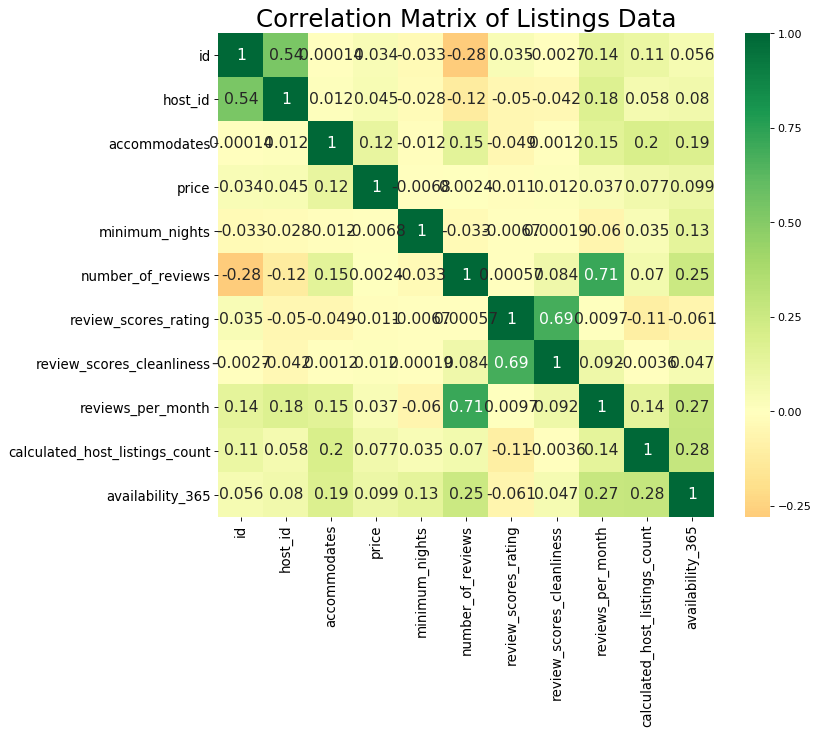

In [60]:
# Plot histogram
plt.figure(figsize=(10,8), dpi= 80)
sb.heatmap(listings_df.corr(), xticklabels=listings_df.corr().columns, yticklabels=listings_df.corr().columns, cmap='RdYlGn', center=0, annot=True, annot_kws={'size':14})

# Decorations
plt.title('Correlation Matrix of Listings Data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

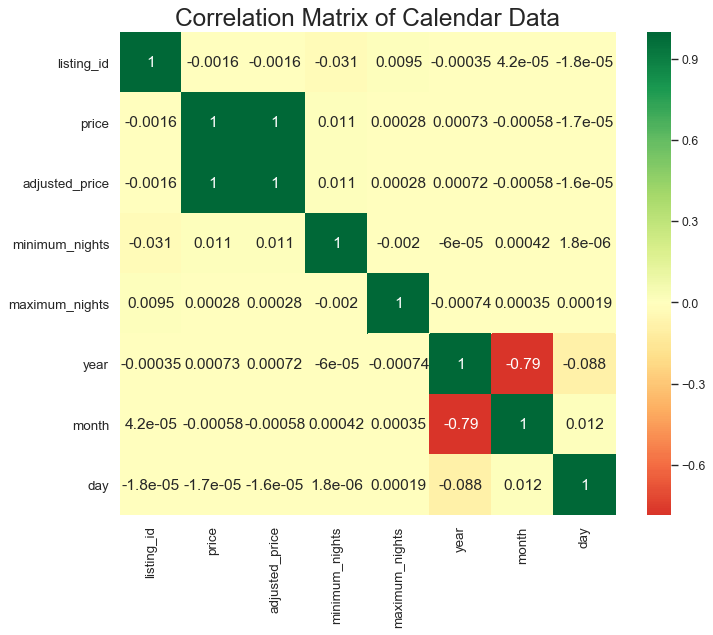

In [223]:
# Plot histogram
plt.figure(figsize=(10,8), dpi= 80)
sb.heatmap(calendar20_df.corr(), xticklabels=calendar20_df.corr().columns, yticklabels=calendar20_df.corr().columns, cmap='RdYlGn', center=0, annot=True, annot_kws={'size':14})

# Decorations
plt.title('Correlation Matrix of Calendar Data', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# fix for mpl bug that cuts off top/bottom of seaborn visualization
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

## Business Understanding
After exploring the data, we are now interested in looking more into detail of the proposed data. Potential questions we could ask are
- How are the prices regarding room types?
- Which neighbourhoods offer the most Airbnb listings?
- Do I safe a lot of money compared to the usual hotel room?
- What is the optimal amount of people I should travel with to optimize my budget?
- Which months are best to travel regarding occupancy and prices?
- How does Corona affect the market for Airbnb listings in Berlin?

#### What is the average price for each listing? How are room types distributed?

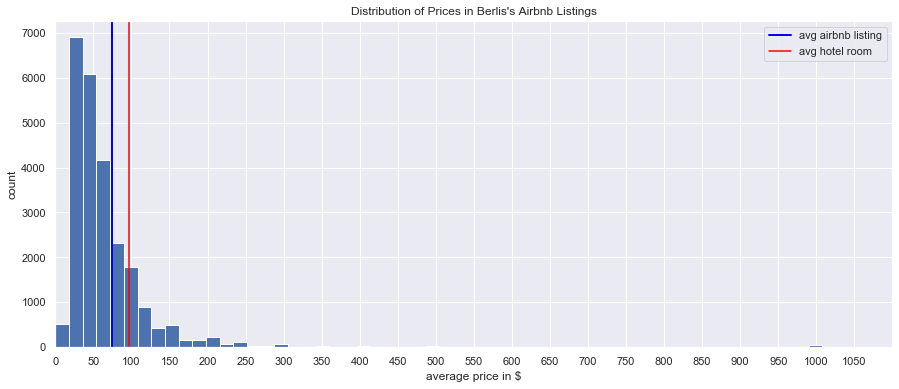

In [49]:
#get the average price for each listing
mean_price_for_listing = listings_df.groupby('id')['price'].mean()
avg_price_hotel_room = 97

#plot figure
plt.figure(figsize=(15,6))
plt.hist(mean_price_for_listing, bins=500)
plt.xlim([0,1100])
plt.axvline(listings_df.price.mean(), linewidth=2, color='blue', label='avg airbnb listing')
plt.axvline(avg_price_hotel_room, color='red', label='avg hotel room')
plt.xlabel('average price in $')
plt.ylabel('count')
plt.xticks(ticks=np.arange(0, 1100, 50))
plt.legend(loc='best')
plt.title("Distribution of Prices in Berlis's Airbnb Listings")
plt.show()

#listings_df.groupby(['neighbourhood_group_cleansed', 'room_type'])['review_scores_rating'].mean()

**Observation**:
- Airbnb listings in Berlin are on average less expensive than hotel rooms (97€ per night)
- Most listings in Berlin are centered between 25 - 75 € per night
- As expected, we have a right skewed distribution due to some big outliers in the data which can be attributed to luxury accommodations. 

In [53]:
# create a waffle plot
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

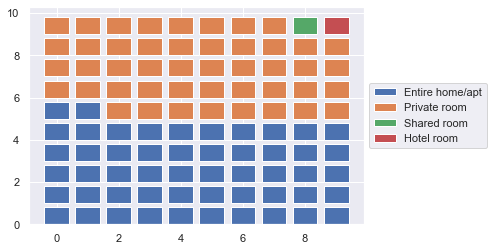

In [52]:
waffle_counts = percentage_blocks(listings_df, 'room_type')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
    prev_count += waffle_counts[cat]

**Observation**:
- We have a faily evenly distribution between private rooms and entire homes/appartments which together account for over 95% of the listings.
- We can assume that customers value privacy and the added touch of Airbnb's value propositon "At home everywhere" because those types differ to shared rooms in that you do not have to spend time with strangers in one room whereas you also have more contact closeness to the host compared to a normal hotel room

#### What is the distribution in listings based on neighbourhood? What is the average price in each neighborhood per month?

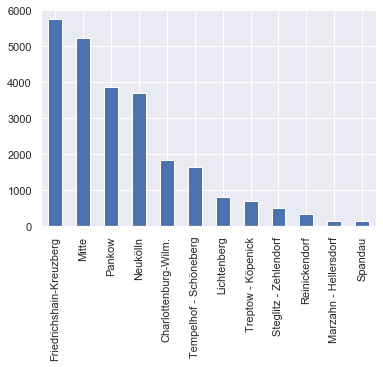

In [166]:
listings_df.neighbourhood_group_cleansed.value_counts().plot.bar();

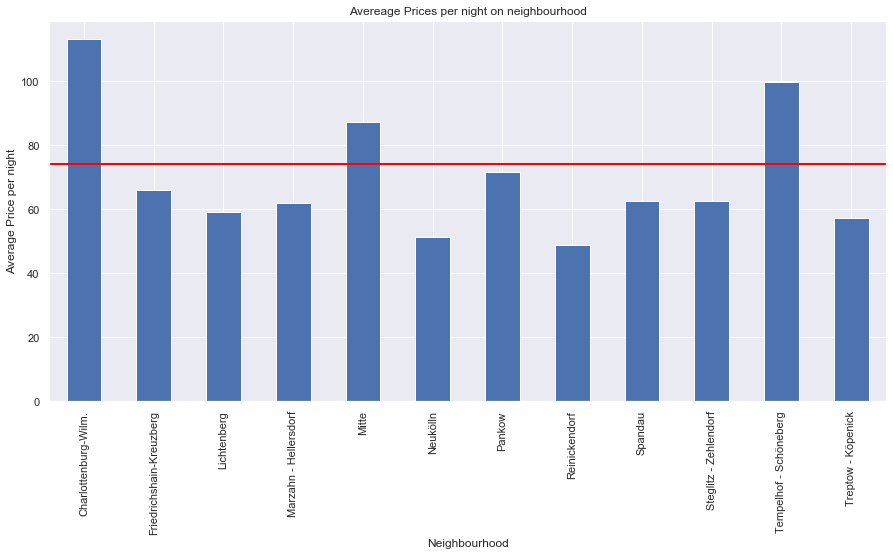

In [184]:
fig, ax = plt.subplots(figsize=(15,7))
listings_df.groupby(['neighbourhood_group_cleansed'])['price'].mean().plot.bar(ax=ax)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price per night')
plt.title('Avereage Prices per night on neighbourhood')
plt.axhline(listings_df.price.mean(), linewidth=2, color='red')
plt.show()

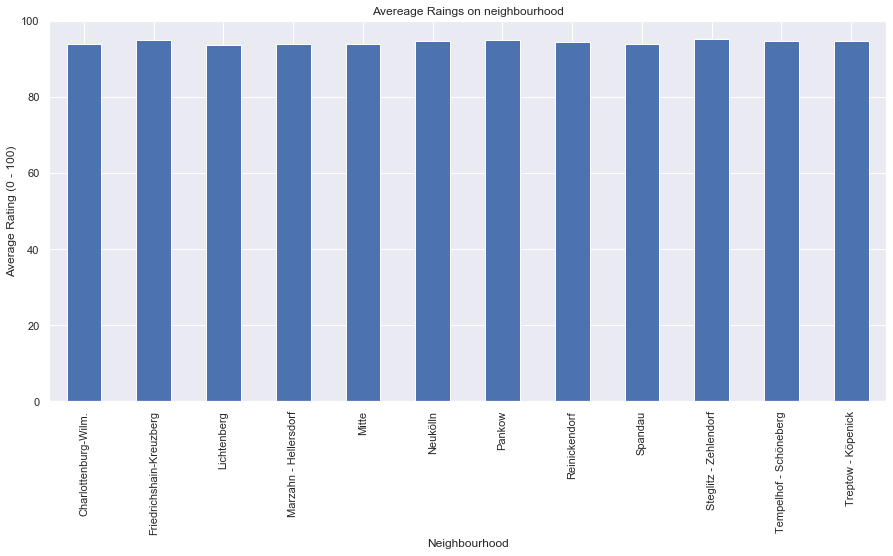

In [185]:
fig, ax = plt.subplots(figsize=(15,7))
listings_df.groupby(['neighbourhood_group_cleansed'])['review_scores_rating'].mean().plot.bar(ax=ax)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Rating (0 - 100)')
plt.title('Avereage Raings on neighbourhood')
plt.show()

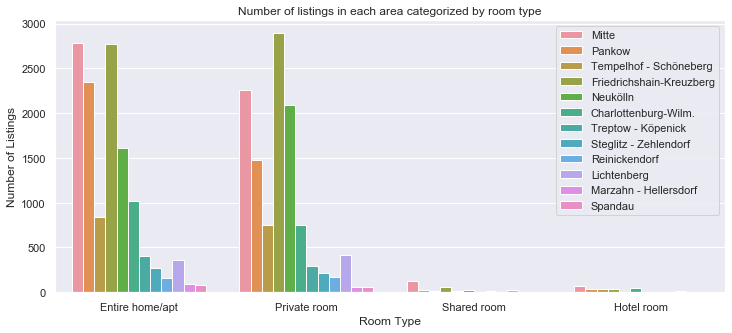

In [183]:
cat2_order = list(listings_df.neighbourhood_group_cleansed.unique())
cat1_order = list(listings_df.room_type.unique())

plt.figure(figsize = [12, 5])

sb.countplot(data = listings_df, x = 'room_type', hue = 'neighbourhood_group_cleansed',
             order = cat1_order, hue_order = cat2_order)
plt.legend(loc="upper right")
plt.title('Number of listings in each area categorized by room type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

**Observation**:
- It looks like that Mitte, Pankow, Friedrichshain-Kreuzberg and Neukölln are the largest areas with regards to number of listings
- Charlottenburg has the highest average prices per night
- Charlottenburg, Mitte and Tempelhof have listings that are on average more expensive
- Most affordable are Neukölln and Friedrichsdorf
- Friedrichshain-Kreuzberg and Pankow are closer to the mean price of the whole city
- The average ratings of the listings do not provide any significant insights on which areas to avoid for potential tenants as it seems that all areas have similar average ratings

#### Looking at the four areas with the most listings, where should I go as a Berlin tourist?

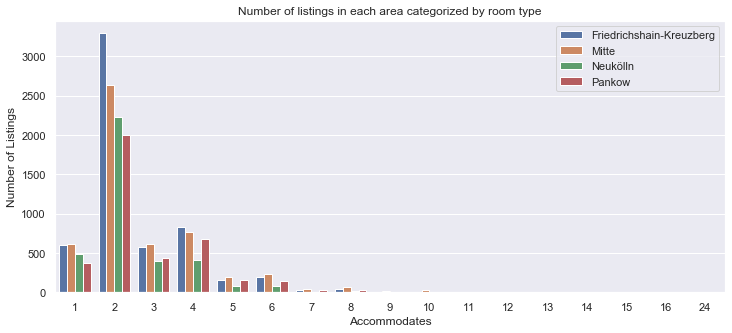

In [198]:
city_df = listings_df.query('neighbourhood_group_cleansed in ("Friedrichshain-Kreuzberg", "Neukölln", "Pankow", "Mitte")')
city_df = city_df.reset_index().drop('index', axis=1)

cat2_order = list(sorted(city_df.neighbourhood_group_cleansed.unique()))
cat1_order = list(sorted(city_df.accommodates.unique()))

plt.figure(figsize = [12, 5])

sb.countplot(data = city_df, x = 'accommodates', hue = 'neighbourhood_group_cleansed',
             order = cat1_order, hue_order = cat2_order)
plt.legend(loc="upper right")
plt.title('Number of listings in each area categorized by room type')
plt.xlabel('Accommodates')
plt.ylabel('Number of Listings')
plt.show()

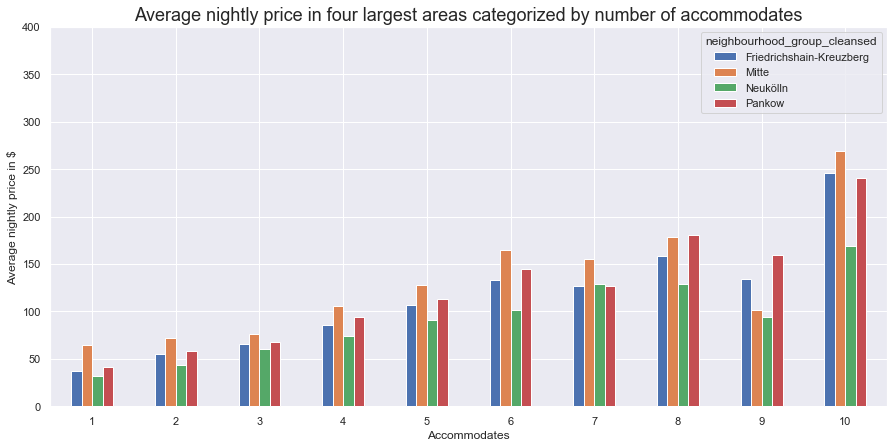

In [217]:
fig, ax = plt.subplots(figsize=(15,7))
city_df.groupby(['accommodates', 'neighbourhood_group_cleansed'])['price'].mean().unstack().plot.bar(ax=ax)
plt.xticks(rotation=0)
plt.title('Average nightly price in four largest areas categorized by number of accommodates', fontsize=18)
plt.xlabel('Accommodates')
plt.xlim([-0.5,9.5])
plt.ylim([-1, 400])
plt.ylabel('Average nightly price in $')
plt.show()

**Observation**:
- We can see that prices rice as number of possible occupants rise. This a very plausible observation. 
- However, it might be worth noticing that for instance if you are in a group of 6, you might consider looking for listings that allow for up to 9 people as prices do not rise so much in this interval.
- If you are travelling as a couple, alone, or in a group of 4 - 5 people you should look accordingly for the maximum amount of occupants.

#### What is the average number of reviews per listing? How many listings per month? What is occupancy rate?

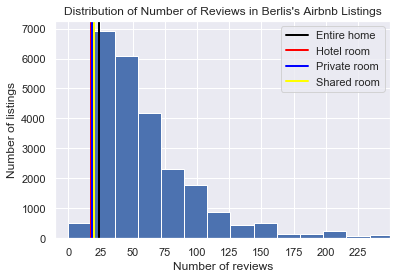

In [77]:
#get the average number of reviews per listing
avg_num_reviews = listings_df.groupby('id')['number_of_reviews'].mean()
avg_num_reviews_rt = listings_df.groupby('room_type')['number_of_reviews'].mean()

plt.hist(mean_price_for_listing, bins=500)
plt.xlim([-10,250])
plt.xticks(ticks=np.arange(0, 250, 25))
plt.axvline(avg_num_reviews_rt[0], linewidth=2, color='black', label='Entire home')
plt.axvline(avg_num_reviews_rt[1], linewidth=2, color='red', label='Hotel room')
plt.axvline(avg_num_reviews_rt[2], linewidth=2, color='blue', label='Private room')
plt.axvline(avg_num_reviews_rt[3], linewidth=2, color='yellow', label='Shared room')
plt.xlabel('Number of reviews')
plt.ylabel('Number of listings')
plt.legend(loc='best')
plt.title("Distribution of Number of Reviews in Berlis's Airbnb Listings")
plt.show()

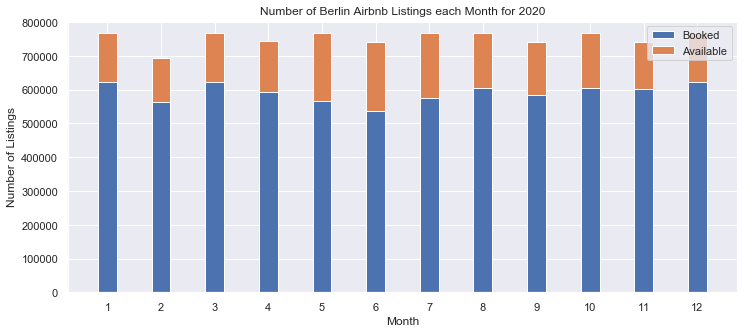

In [240]:
grouped_availability20 = calendar20_df.groupby(['month', 'available'])['listing_id'].count()

N = 12
booked20 = [i for i in altElementEven(grouped_availability20)]
available20 = [i for i in altElementOdd(grouped_availability20)]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(12,5))
p1 = plt.bar(ind, booked20, width)
p2 = plt.bar(ind, available20, width,
             bottom=booked20)

plt.ylabel('Number of Listings')
plt.xlabel('Month')
plt.title('Number of Berlin Airbnb Listings each Month for 2020')
plt.xticks(ind, np.arange(1, 13, 1))
plt.legend((p1[0], p2[0]), ('Booked', 'Available'))

plt.show()

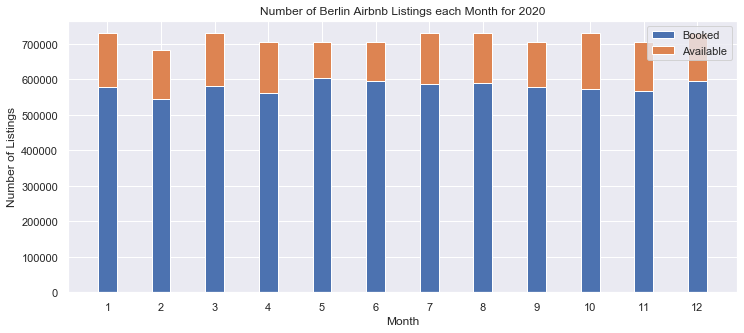

In [241]:
grouped_availability19 = calendar19_df.groupby(['month', 'available'])['listing_id'].count()

N = 12
booked19 = [i for i in altElementEven(grouped_availability19)]
available19 = [i for i in altElementOdd(grouped_availability19)]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(12,5))
p1 = plt.bar(ind, booked19, width)
p2 = plt.bar(ind, available19, width,
             bottom=booked19)

plt.ylabel('Number of Listings')
plt.xlabel('Month')
plt.title('Number of Berlin Airbnb Listings each Month for 2020')
plt.xticks(ind, np.arange(1, 13, 1))
plt.legend((p1[0], p2[0]), ('Booked', 'Available'))

plt.show()

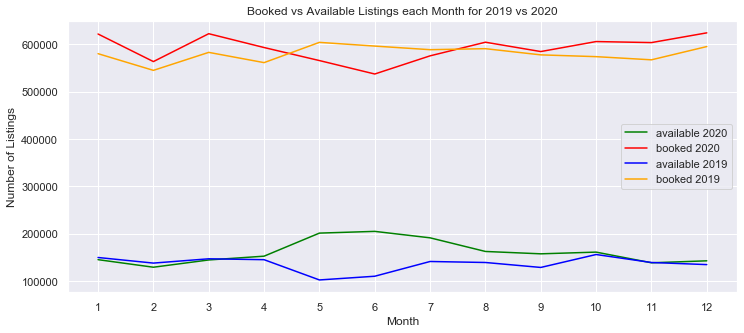

In [242]:
plt.figure(figsize=(12,5))
plt.plot(available20, color='green', label='available 2020')
plt.plot(booked20, color='red', label='booked 2020')
plt.plot(available19, color='blue', label='available 2019')
plt.plot(booked19, color='orange', label='booked 2019')
plt.ylabel('Number of Listings')
plt.xlabel('Month')
plt.title('Booked vs Available Listings each Month for 2019 vs 2020')
plt.legend(loc='best')
plt.xticks(ind, np.arange(1, 13, 1))
plt.show()

In [228]:
grouped_price20 = calendar20_df.groupby(['month'])['price'].mean()
grouped_price20 = [i for i in grouped_price20]

grouped_price19 = calendar19_df.groupby(['month'])['price'].mean()
grouped_price19 = [i for i in grouped_price19]

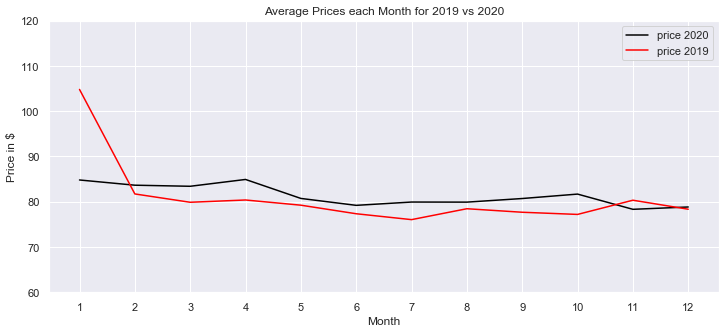

In [239]:
plt.figure(figsize=(12,5))
plt.plot(grouped_price20, color='black', label='price 2020')
plt.plot(grouped_price19, color='red', label='price 2019')
plt.ylabel('Price in $')
plt.xlabel('Month')
plt.title('Average Prices each Month for 2019 vs 2020')
plt.ylim([60,120])
plt.legend(loc='best')
plt.xticks(ind, np.arange(1, 13, 1))
plt.show()

**Observation**:
- On average, most listings have around 20 reviews which is somehow a magic number for many Airbnb hosts. 
- In contrast to earlier results from peers researching Boston and Seattle data from 2016, this year the numbers of available appartments are much higher in summer (month 6 - 9) than in winter (months 12 - 2). 
- The reason probably is the corona virus that forces many people to reschedule their holiday plans.
- In media news, Airbnb is not doing very well at the moment (Stand: 16th May 2020) trying to keep hosts on their platform with various monetary and non-monetary incentives.
- The coming months will tell how strong the Airbnb community truly is and whether the number of listings will go down, up or stay the same.
- Bookings for the months April to October decreased significantly. There are many free listings available compared to last year.